In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import annotation_analysis as an
from Data import symbol_graph as sg
import text_encoding
from importlib import reload
reload(an); reload(sg); reload(text_encoding)

<module 'text_encoding' from 'C:\\Users\\javi-\\OneDrive\\Documentos\\GitHub\\context-art-classification\\text_encoding.py'>

In [5]:
an.args_dict.dir_dataset = r'E:\Mi unidad\Code\SemArt\\'

# Modalidad 1: coger las top 100

In [66]:
chosen_coded_semart_train, chosen_coded_semart_val, chosen_coded_semart_test, word_names = \
            text_encoding.bow_load_train_text_corpus(an.args_dict.dir_dataset, append='append', k=100, top=True, explain=True)

In [67]:
word_names

array(['painting', 'painted', 'st', 'work', 'picture', 'figures', 'left',
       'portrait', 'paintings', 'artist', 'right', 'century', 'life',
       'scene', 'christ', 'painter', 'scenes', 'shows', 'van', 'panel',
       'landscape', 'church', 'composition', 'virgin', 'art', 'subject',
       'figure', 'works', 'light', 'time', 'wall', 'style', 'background',
       'altarpiece', 'portraits', 'known', 'like', 'probably', 'man',
       'small', 'saint', 'hand', 'child', 'large', 'early', 'young',
       'present', 'great', 'john', 'later', 'new', 'seen', 'rome',
       'depicted', 'family', 'years', 'executed', 'depicts', 'panels',
       'woman', 'pictures', 'artists', 'mary', 'fresco', 'view', 'king',
       'painters', 'old', 'chapel', 'central', 'san', 'foreground',
       'commissioned', 'series', 'colour', 'centre', 'master', 'death',
       'group', 'son', 'room', 'period', 'influence', 'saints', 'dutch',
       'ceiling', 'city', 'head', 'madonna', 'example', 'di', 'signed',
  

In [68]:
formatted_argsort = [np.argsort(chosen_coded_semart_train.sum(axis=0))[0, x] for x in range(100)]
print([word_names[x] for x in formatted_argsort])
print(np.sort(chosen_coded_semart_train.sum(axis=0)))

['venice', 'set', 'space', 'paris', 'number', 'way', 'important', 'represents', 'signed', 'di', 'example', 'madonna', 'head', 'city', 'ceiling', 'dutch', 'saints', 'influence', 'period', 'room', 'son', 'group', 'death', 'master', 'centre', 'colour', 'series', 'commissioned', 'foreground', 'san', 'central', 'chapel', 'old', 'painters', 'king', 'view', 'fresco', 'mary', 'artists', 'pictures', 'woman', 'panels', 'depicts', 'executed', 'years', 'family', 'depicted', 'rome', 'seen', 'new', 'later', 'john', 'great', 'present', 'young', 'early', 'large', 'child', 'hand', 'saint', 'small', 'man', 'probably', 'like', 'known', 'portraits', 'altarpiece', 'background', 'style', 'wall', 'time', 'light', 'works', 'figure', 'subject', 'art', 'virgin', 'composition', 'church', 'landscape', 'panel', 'van', 'shows', 'scenes', 'painter', 'christ', 'scene', 'life', 'century', 'right', 'artist', 'paintings', 'portrait', 'left', 'figures', 'picture', 'work', 'st', 'painted', 'painting']
[[  880   899   910 

In [107]:
(chosen_coded_semart_train.sum(axis=1)==0).sum(axis=0)

matrix([[5]])

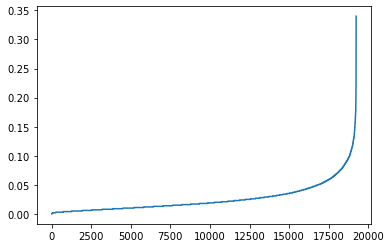

In [114]:
plt.plot(np.sort(chosen_coded_semart_train.mean(axis=1), axis=0))

## Modalidad 2: coger las que aparecen más de 10 veces

In [126]:
chosen_coded_semart_train, chosen_coded_semart_val, chosen_coded_semart_test, word_names = \
            text_encoding.bow_load_train_text_corpus(an.args_dict.dir_dataset, append='append', k=10, top=False, explain=True)

In [127]:
chosen_coded_semart_train.shape

(19244, 10445)

In [122]:
np.mean(chosen_coded_semart_train.sum(axis=1)>0)

1.0

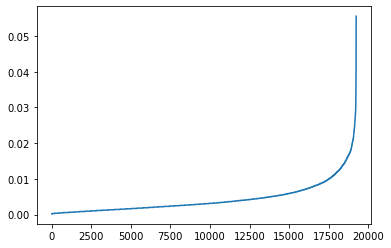

In [123]:
plt.plot(np.sort(chosen_coded_semart_train.mean(axis=1), axis=0))

## Análisis comunes

In [124]:
tentative_size = 1000
chosen_coded_semart_train, chosen_coded_semart_val, chosen_coded_semart_test, word_names = \
            text_encoding.bow_load_train_text_corpus(an.args_dict.dir_dataset, append='append', k=tentative_size, top=True, explain=True)

(19244, 1000)

In [119]:
most_common_words_sorted = np.argsort(chosen_coded_semart_train.sum(axis=0))
most_common_words_sorted = [most_common_words_sorted[0,x] for x in range(tentative_size)][::-1]

In [120]:
list_words = np.full((tentative_size,), False, dtype=bool)
res = []
for ix, word_ix in enumerate(most_common_words_sorted):
    list_words[word_ix] = True
    paintings_present = np.mean(chosen_coded_semart_train[:, list_words].sum(axis=1)>0)
    #list_words[word_ix] = False
    res.append(paintings_present)


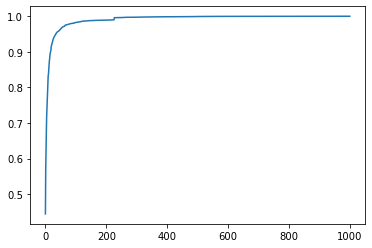

In [106]:
plt.plot(res)